In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# load the train dataset
train = pd.read_csv('train.csv')

train.head(2)

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3


In [3]:
# load the test dataset
test = pd.read_csv('test.csv')

test.head(2)

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel
0,Customer_708,Male,149170,Rural,Married,Lagos,4224.631209,Not_interested,Bronze,O_Level,...,218.598065,SUV,Medsize,1,49,0,1,Personal,P_L3,Agent
1,Customer_47,Female,46436,Suburban,Single,Abuja,5516.344018,Not_interested,Bronze,O_Level,...,447.793440,Two-Door Car,Medsize,7,10,0,4,Personal,P_L2,Agent


In [4]:
# load the sample submission
ss = pd.read_csv('sample_submission.csv')

ss.head(2)

,Customer_ID,Best_Offer
0,Customer_708,1
1,Customer_47,1


In [5]:
# Check out the shape of each dataset
print(train.shape) ;
print(test.shape) ;
print(ss.shape)

(6393, 24)
(2741, 23)
(2741, 2)


### Concatenation of both train and test datasets

In [6]:
df = pd.concat([train, test], ignore_index= True)

df.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1.0
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3.0
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0.0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1.0
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    9134 non-null   object 
 1   Sex                            9134 non-null   object 
 2   Earnings                       9134 non-null   int64  
 3   Region_Code                    9134 non-null   object 
 4   Marital Status                 9134 non-null   object 
 5   State_of_Origin                9134 non-null   object 
 6   Customer_Worth                 9134 non-null   float64
 7   Customer_Reply                 9134 non-null   object 
 8   Plan                           9134 non-null   object 
 9   Certification                  9134 non-null   object 
 10  Effective To Date              9134 non-null   object 
 11  Status_of_Employment           9134 non-null   object 
 12  Premium_Auto_per_Month         9134 non-null   i

In [8]:
# statistical analysis
df.describe()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,6393.000000
mean,75314.760018,8006.940475,186.438581,434.088794,15.097000,48.064594,0.768776,2.966170,0.968247
std,60759.809468,6870.967608,68.815935,290.500092,10.073257,27.905991,1.820767,2.390182,1.010780
min,0.000000,1900.007675,122.000000,0.099007,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,3996.251794,136.000000,272.258244,6.000000,24.000000,0.000000,1.000000,0.000000
50%,67779.000000,5782.182197,166.000000,383.945434,14.000000,48.000000,0.000000,2.000000,1.000000
75%,124640.000000,8964.167041,218.000000,547.514839,23.000000,71.000000,0.000000,4.000000,2.000000
max,199962.000000,83327.381190,596.000000,2893.239678,35.000000,99.000000,10.000000,9.000000,3.000000


### Data Transformation

In [9]:
train['Best_Offer'].unique()

array([1, 3, 0, 2], dtype=int64)

In [10]:
# The idea here is to check for the values in each non-numerical datatype
# This gives us an idea of how to encode it
for i in train.columns[(train.dtypes =='object').values].tolist():
    print(i,'\n')
    print(train[i].value_counts())
#     print('\n')

Customer_ID 

Customer_5883    1
Customer_8229    1
Customer_305     1
Customer_46      1
Customer_1240    1
                ..
Customer_988     1
Customer_1338    1
Customer_2065    1
Customer_9121    1
Customer_1137    1
Name: Customer_ID, Length: 6393, dtype: int64
Sex 

Female    3259
Male      3134
Name: Sex, dtype: int64
Region_Code 

Suburban    4046
Rural       1231
Urban       1116
Name: Region_Code, dtype: int64
Marital Status 

Married     3735
Single      1682
Divorced     976
Name: Marital Status, dtype: int64
State_of_Origin 

Lagos    2225
Abuja    1819
Imo      1158
Enugu     646
Kano      545
Name: State_of_Origin, dtype: int64
Customer_Reply 

Not_interested    5494
Interested         899
Name: Customer_Reply, dtype: int64
Plan 

Bronze    3895
Silver    1928
Gold       570
Name: Plan, dtype: int64
Certification 

First_Degree     1896
HND              1880
O_Level          1864
Second_Degree     500
PHD               253
Name: Certification, dtype: int64
Effective To

## Checking for null values

In [11]:
df.isnull().sum()

Customer_ID                         0
Sex                                 0
Earnings                            0
Region_Code                         0
Marital Status                      0
State_of_Origin                     0
Customer_Worth                      0
Customer_Reply                      0
Plan                                0
Certification                       0
Effective To Date                   0
Status_of_Employment                0
Premium_Auto_per_Month              0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
Months Since Last Claim             0
Months Since Policy Inception       0
Counts_of_Open_Complaints           0
No_Of_POlicy                        0
kind_of_policy                      0
Active_Policy                       0
Sales Channel                       0
Best_Offer                       2741
dtype: int64

# Univariate Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'), Text(1, 0, '1.0'), Text(2, 0, '2.0'), Text(3, 0, '3.0')])

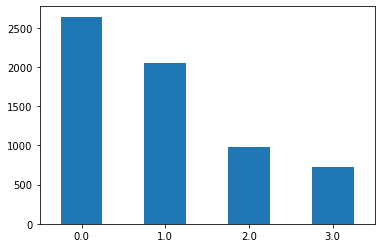

In [12]:
df['Best_Offer'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

### The above plot shows a little noise. It can be infered that there is some form of biasness in the dataset

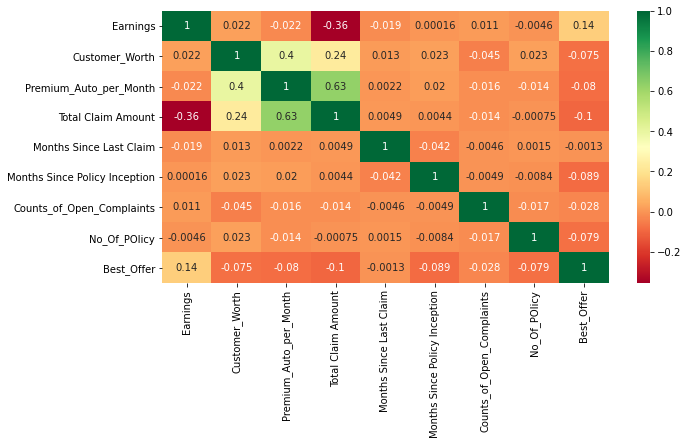

In [13]:
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Bivariate Analysis

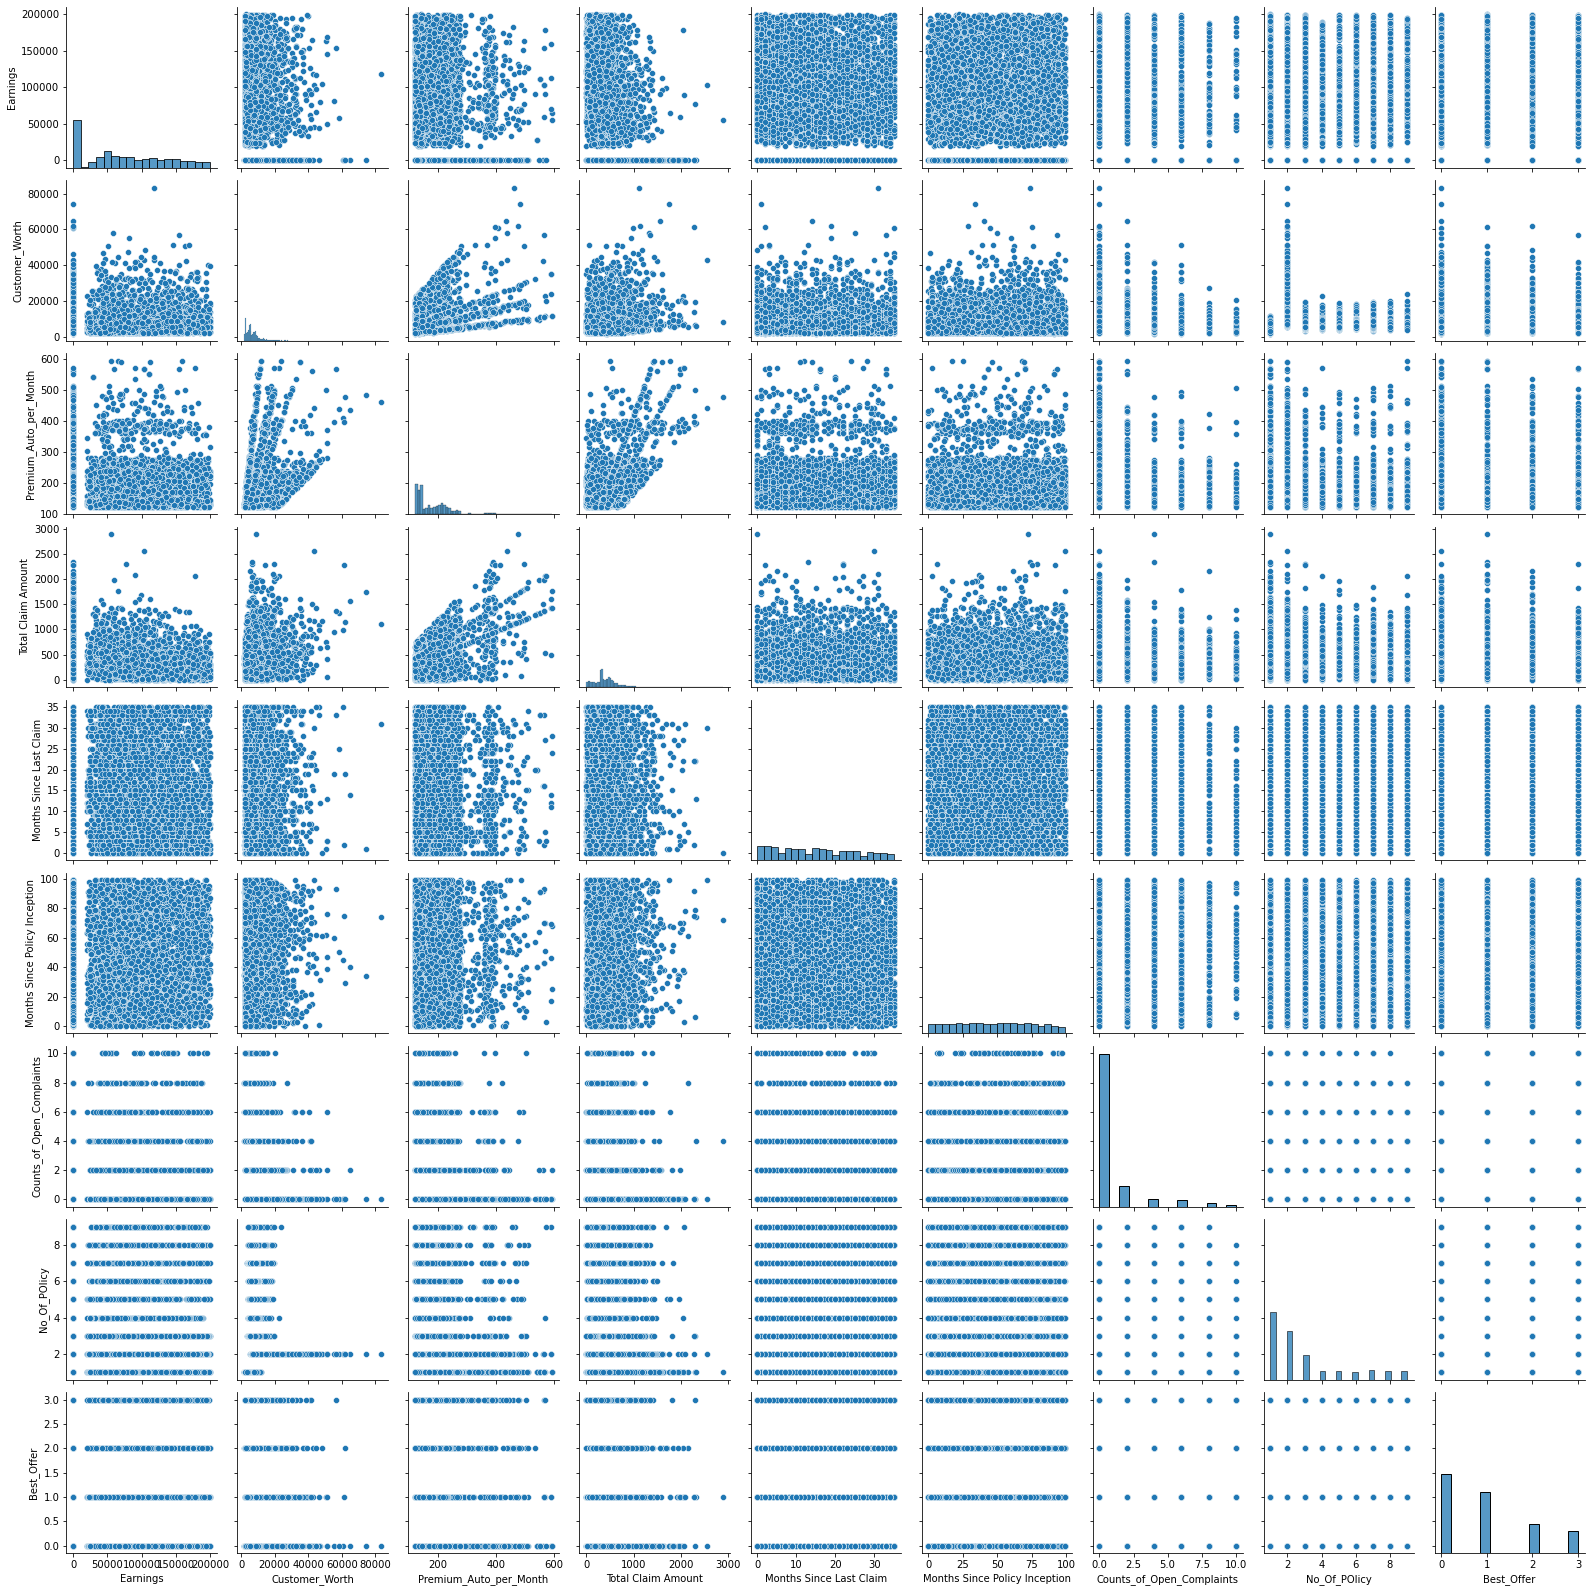

In [14]:
#shows how each of the attributes are related to each other
sns.pairplot(train)

### Data Selection

In [15]:
features = ['Sex', 'Region_Code', 'Marital Status', 'State_of_Origin', 'Customer_Reply', 'Plan', 'Certification','Effective To Date', 'Status_of_Employment', 'Vehicle Class','Vehicle Size','kind_of_policy','Active_Policy', 'Sales Channel' ]


target = 'Best_Offer'

### Encoding Categorical datatypes

In [16]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [17]:
labBin = LabelBinarizer()
labEnc = LabelEncoder()

In [18]:
fea_df = df[features]

In [19]:
fea_df.head()

,Sex,Region_Code,Marital Status,State_of_Origin,Customer_Reply,Plan,Certification,Effective To Date,Status_of_Employment,Vehicle Class,Vehicle Size,kind_of_policy,Active_Policy,Sales Channel
0,Female,Suburban,Single,Kano,Interested,Silver,First_Degree,3/2/2011,Fully_Employed,SUV,Medsize,Corporate,C_L2,Agent
1,Female,Suburban,Married,Abuja,Not_interested,Silver,First_Degree,1/22/11,Fully_Employed,SUV,Small,Personal,P_L2,Agent
2,Female,Suburban,Divorced,Lagos,Interested,Silver,HND,2/14/11,In_Retirement,Sports Car,Medsize,Personal,P_L3,Agent
3,Female,Suburban,Single,Imo,Not_interested,Silver,HND,8/1/2011,Not_employed,Sports Car,Medsize,Personal,P_L2,Branch
4,Male,Rural,Single,Imo,Not_interested,Silver,PHD,2/19/11,Fully_Employed,Four-Door Car,Medsize,Personal,P_L2,Call Center


In [20]:
fea_df['Sex'] = labBin.fit_transform(fea_df['Sex'])
fea_df['Region_Code'] = labEnc.fit_transform(fea_df['Region_Code'])
fea_df['Marital Status'] = labBin.fit_transform(fea_df['Marital Status'])
fea_df['State_of_Origin'] = labEnc.fit_transform(fea_df['State_of_Origin'])
fea_df['Customer_Reply'] = labEnc.fit_transform(fea_df['Customer_Reply'])
fea_df['Plan'] = labBin.fit_transform(fea_df['Plan'])
fea_df['Certification'] = labEnc.fit_transform(fea_df['Certification'])
fea_df['Effective To Date'] = labBin.fit_transform(fea_df['Effective To Date'])
fea_df['Status_of_Employment'] = labEnc.fit_transform(fea_df['Status_of_Employment'])
fea_df['Vehicle Class'] = labBin.fit_transform(fea_df['Vehicle Class'])
fea_df['Vehicle Size'] = labEnc.fit_transform(fea_df['Vehicle Size'])
fea_df['kind_of_policy'] = labEnc.fit_transform(fea_df['kind_of_policy'])
fea_df['Active_Policy'] = labBin.fit_transform(fea_df['Active_Policy'])
fea_df['Sales Channel'] = labEnc.fit_transform(fea_df['Sales Channel'])

<ipython-input-20-2c632c9117ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fea_df['Sex'] = labBin.fit_transform(fea_df['Sex'])
<ipython-input-20-2c632c9117ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fea_df['Region_Code'] = labEnc.fit_transform(fea_df['Region_Code'])
<ipython-input-20-2c632c9117ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [21]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sex                   9134 non-null   int32
 1   Region_Code           9134 non-null   int32
 2   Marital Status        9134 non-null   int32
 3   State_of_Origin       9134 non-null   int32
 4   Customer_Reply        9134 non-null   int32
 5   Plan                  9134 non-null   int32
 6   Certification         9134 non-null   int32
 7   Effective To Date     9134 non-null   int32
 8   Status_of_Employment  9134 non-null   int32
 9   Vehicle Class         9134 non-null   int32
 10  Vehicle Size          9134 non-null   int32
 11  kind_of_policy        9134 non-null   int32
 12  Active_Policy         9134 non-null   int32
 13  Sales Channel         9134 non-null   int32
dtypes: int32(14)
memory usage: 499.6 KB


### Splitting the dataframe back into train and test

In [22]:
train_df = fea_df[:len(train)]
test_df = fea_df[len(train):]

In [23]:
print(df.shape)
print(fea_df.shape)
print(train_df.shape)
print(test_df.shape)

(9134, 24)
(9134, 14)
(6393, 14)
(2741, 14)


In [24]:
train_df.shape, train.shape, test_df.shape, test.shape

((6393, 14), (6393, 24), (2741, 14), (2741, 23))

In [25]:
X = train_df.copy()

In [26]:
y = train['Best_Offer']

In [27]:
# this would be used as the edited test dataset
test_X = test_df[X.columns]

In [28]:
test_X.head()

,Sex,Region_Code,Marital Status,State_of_Origin,Customer_Reply,Plan,Certification,Effective To Date,Status_of_Employment,Vehicle Class,Vehicle Size,kind_of_policy,Active_Policy,Sales Channel
6393,1,0,0,4,1,1,2,0,1,0,1,1,0,0
6394,0,1,0,0,1,1,2,0,1,0,1,1,0,0
6395,0,1,0,0,0,0,1,0,1,0,2,1,0,0
6396,0,2,0,4,1,0,1,0,1,1,1,1,0,1
6397,0,1,1,3,1,1,2,0,0,1,1,1,0,1


### Data Preprocessing

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state= 2021)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5434, 14)
(5434,)
(959, 14)
(959,)


## Model building

## 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Public\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
log_reg_pred = logreg.predict(X_test)

In [33]:
logistic_model_prediction = logreg.predict(test_X)

In [34]:
ss['Best_Offer'] = logistic_model_prediction

In [35]:
# ss.to_csv('logregmodel.csv', index= False)

## 2. Gradient Boost Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
grb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=7, max_features=5)
grb

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=5,
                           n_estimators=500)

In [38]:
grb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=7, max_features=5,
                           n_estimators=500)

In [39]:
y_pred_grb = grb.predict(X_test)

In [40]:
text_X_pred_grb = grb.predict(test_X)

In [41]:
ss['Best_Offer'] = text_X_pred_grb

In [42]:
# ss.to_csv('grbmodel.csv', index= False)

## 3. XGBoost Classifier

In [43]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=5000, learning_rate=0.01,)
xgb_model.fit(X_train, y_train, verbose=200)

C:\Users\Public\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
y_pred_xgb = xgb_model.predict(X_test)

In [45]:
text_X_pred_xgb = xgb_model.predict(test_X)

In [46]:
ss['Best_Offer'] = text_X_pred_xgb

In [47]:
# ss.to_csv('xgbmodel.csv', index= False)

## 4. Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)

GaussianNB()

In [49]:
y_pred_naive = naivemodel.predict(X_test)

In [50]:
text_X_pred_naive = naivemodel.predict(test_X)

In [51]:
ss['Best_Offer'] = text_X_pred_naive

In [52]:
# ss.to_csv('naivemodel.csv', index= False)

## 5. Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
randforestmodel = RandomForestClassifier()

In [55]:
randforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred_random = randforestmodel.predict(X_test)

In [57]:
text_X_pred_randomforest = randforestmodel.predict(test_X)

In [58]:
ss['Best_Offer'] = text_X_pred_randomforest

In [59]:
# ss.to_csv('randomforestmodel.csv', index= False)

## 6. Support Vector Machine

In [60]:
from sklearn.svm import SVC

SVMmodel = SVC()

SVMmodel.fit(X_train, y_train)

SVC()

In [61]:
SVMmodel_prediction = SVMmodel.predict(X_test)

In [62]:
y_pred_SVM = SVMmodel.predict(test_X)

In [63]:
ss['Best_Offer'] = y_pred_SVM

In [64]:
# ss.to_csv('SVMmodel.csv', index= False)

## 7. Decision Tree Classifier

In [65]:
from sklearn. tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [66]:
clfmodel = clf.predict(X_test)

In [67]:
test_X_pred_clf = clf.predict(test_X)

In [68]:
ss['Best_Offer'] = test_X_pred_clf

In [69]:
# ss.to_csv('clfmodel.csv', index= False)